Figuring out how to read/organize my files

In [6]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [7]:
archive = pd.read_csv('data/fer2013.csv')
archive['image'] = archive['pixels'].apply(lambda x: np.array(x.split()).astype(int).reshape(48,48))

<BarContainer object of 7 artists>

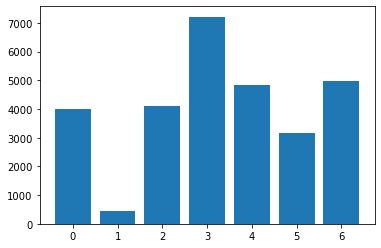

In [29]:
plt.bar(range(7),archive.emotion[archive.Usage == 'Training'].value_counts().sort_index())

<BarContainer object of 7 artists>

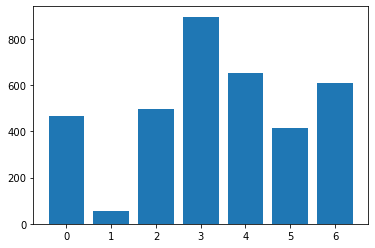

In [30]:
plt.bar(range(7),archive.emotion[archive.Usage == 'PublicTest'].value_counts().sort_index())

<BarContainer object of 7 artists>

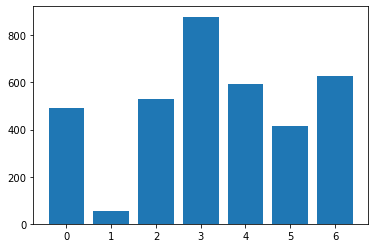

In [31]:
plt.bar(range(7),archive.emotion[archive.Usage == 'PrivateTest'].value_counts().sort_index())

In [8]:
em_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
em_indices = []
for i in range(7):
    em_indices.append(archive[archive['emotion']==i].index)

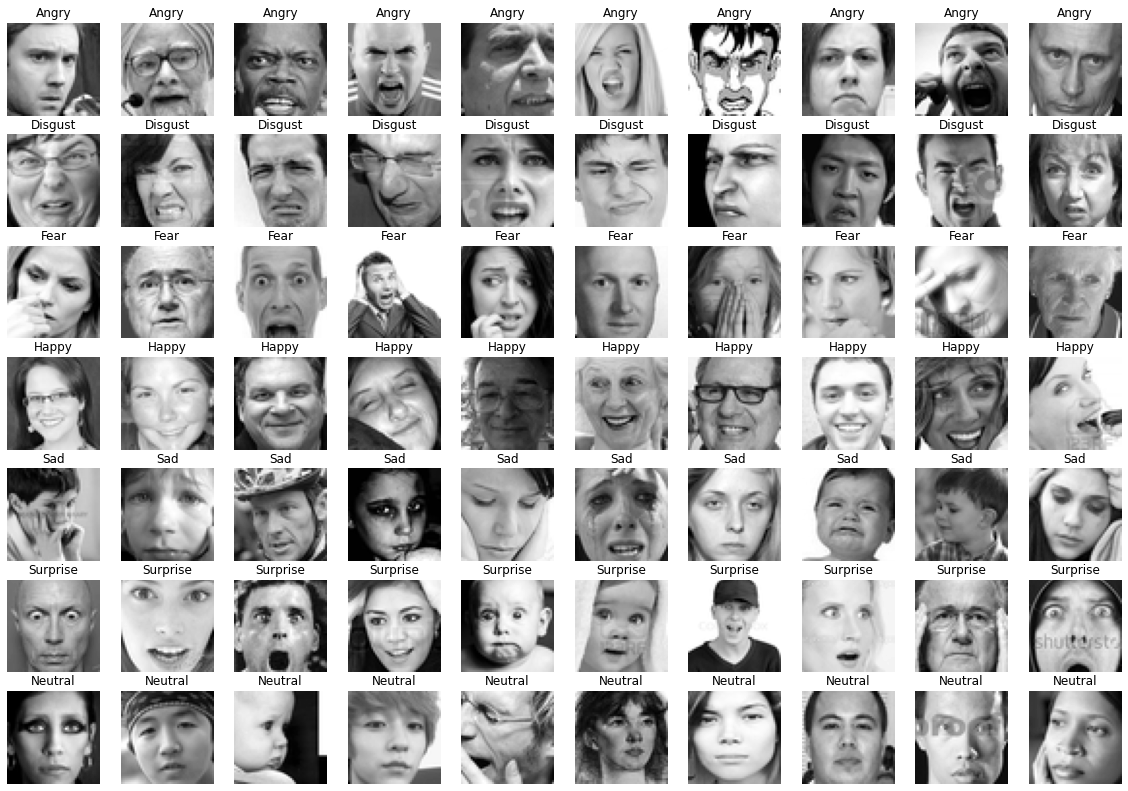

In [4]:
fig,ax = plt.subplots(7,10, figsize=(20,14))
[ax.set_axis_off() for ax in ax.ravel()]
for j in range(7):
    for axi, i in enumerate(em_indices[j][:10]):
        ax[j,axi].imshow(archive.image[i],cmap='gray')
        ax[j,axi].set_title(em_labels[j])

In [2]:
import tensorflow as tf

In [9]:
x_train = np.stack(archive.image[archive.Usage == 'Training'].to_numpy()).reshape(-1, 48, 48, 1)/255
y_train = archive.emotion[archive.Usage == 'Training'].to_numpy()
x_test = np.stack(archive.image[archive.Usage == 'PublicTest'].to_numpy()).reshape(-1, 48, 48, 1)/255
y_test = archive.emotion[archive.Usage == 'PublicTest'].to_numpy()

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, 3, activation = 'relu', padding = 'same', input_shape=(48, 48, 1)),
    tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same'),    
    tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
flatten_3 (Flatten)          (None, 73728)             0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 73728)            

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
898/898 [==============================] - 286s 318ms/step - loss: 1.8322 - accuracy: 0.2373 - val_loss: 1.6489 - val_accuracy: 0.3366
Epoch 2/50
898/898 [==============================] - 281s 313ms/step - loss: 1.6817 - accuracy: 0.3153 - val_loss: 1.5183 - val_accuracy: 0.4001
Epoch 3/50
898/898 [==============================] - 279s 311ms/step - loss: 1.5972 - accuracy: 0.3476 - val_loss: 1.4449 - val_accuracy: 0.4402
Epoch 4/50
898/898 [==============================] - 276s 307ms/step - loss: 1.5250 - accuracy: 0.3876 - val_loss: 1.4292 - val_accuracy: 0.4458
Epoch 5/50
898/898 [==============================] - 276s 307ms/step - loss: 1.4719 - accuracy: 0.4073 - val_loss: 1.3679 - val_accuracy: 0.4622
Epoch 6/50
898/898 [==============================] - 278s 309ms/step - loss: 1.4197 - accuracy: 0.4321 - val_loss: 1.3427 - val_accuracy: 0.4801
Epoch 7/50
898/898 [==============================] - 279s 311ms/step - loss: 1.3791 - accuracy: 0.4468 - val_loss: 1.3161 -

In [38]:
x_pred = model.predict(x_test).argmax(axis=1)

In [39]:
x_pred.shape

(3589,)

<BarContainer object of 7 artists>

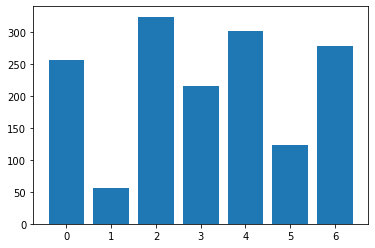

In [44]:
plt.bar(range(7), archive.emotion[archive.Usage == 'PublicTest'][x_pred != y_test].value_counts().sort_index())

In [19]:
model.save('model/model_0.4')

INFO:tensorflow:Assets written to: model/model_0.4/assets


In [12]:
test_img = cv2.imread('src/news_preview_mob_image__preview_404.jpg')
face_cascade = cv2.CascadeClassifier('src/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(test_img, 1.1, 4)
# plt.imshow(test_img)

In [13]:
def get_face(img, face_coord):
    return img[face_coord[1]:face_coord[1]+face_coord[3],face_coord[0]:face_coord[0]+face_coord[2]]

In [14]:
for (x, y, w, h) in faces:
    cv2.rectangle(test_img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(test_img, 'Emotion', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255))